In [1]:
import glob
from generate_descriptors_amptorch import Generate_acsf_descriptor, Generate_soap_descriptor
from ase.io import read, write, Trajectory
import matplotlib.pyplot as plt
import seaborn as sns
from asap3 import EMT
import numpy as np
import os

In [2]:
#save_path = os.path.join(self.traj_dir, '%d_%f_%f_%f_%d_%d_%d_full.traj' %(self.episodes, self.minima['energies'][self.min_idx], self.initial_energy, self.episode_reward, self.n_tot_all_minima, self.n_lower_energy_minima, self.n_unique_minima))

for i, file in enumerate(glob.glob('../result_Cu4Pd5Ni6/trajs/10_*.traj')):
    print(i, file)

0 ../result_Cu4Pd5Ni6/trajs/10_-1.666077_13.767608_-54.555679_3_2_11_full.traj
1 ../result_Cu4Pd5Ni6/trajs/10_-0.857054_12.188821_-1242.946297_2_1_11_full.traj
2 ../result_Cu4Pd5Ni6/trajs/10_0.000000_13.118112_-2140.000000_0_0_11_full.traj
3 ../result_Cu4Pd5Ni6/trajs/10_0.000000_12.931949_-2110.000000_3_0_11_full.traj
4 ../result_Cu4Pd5Ni6/trajs/10_-1.308319_13.044457_-781.681350_3_1_11_full.traj
5 ../result_Cu4Pd5Ni6/trajs/10_-1.797647_13.570350_-342.353480_2_1_11_full.traj
6 ../result_Cu4Pd5Ni6/trajs/10_0.000000_12.840140_-2100.000000_0_0_11_full.traj
7 ../result_Cu4Pd5Ni6/trajs/10_0.000000_13.073728_-2050.000000_0_0_11_full.traj
8 ../result_Cu4Pd5Ni6/trajs/10_-0.614775_12.635496_-1485.224856_1_1_11_full.traj
9 ../result_Cu4Pd5Ni6/trajs/10_0.000000_13.925385_-2020.000000_0_0_11_full.traj
10 ../result_Cu4Pd5Ni6/trajs/10_-1.760279_13.098411_-239.720776_2_1_11_full.traj
11 ../result_Cu4Pd5Ni6/trajs/10_0.000000_12.899136_-2100.000000_0_0_11_full.traj
12 ../result_Cu4Pd5Ni6/trajs/10_0.000

In [3]:
def generate_traj_plot(fname, cif = True):
    traj = Trajectory(fname)
    print(len(traj))
    ene_list = []
    
    cif_dir = f'../result_Cu4Pd5Ni6/cifs/'
    if not os.path.exists(cif_dir):
            os.makedirs(cif_dir)

    for i in range(len(traj)):
        img =  traj[i]
        img.calc = EMT()
        if i == 0:
            initial_energy = img.get_potential_energy()
    
        ene = img.get_potential_energy() - initial_energy
        print(i, ene)
        ene_list.append(ene)

        if cif == True:
            fname_split_list =  fname.split('/')
            #print(fname_split_list)
            cif_fname =  fname_split_list[0] + '/'+ fname_split_list[1] + '/cifs/' +   fname_split_list[2].split('full.traj')[0] +   str(i).zfill(3) +  '_'  + "{:.4f}".format(ene) + '.cif'
            #print(cif_fname)
            write(cif_fname, img, format='cif')

    n = len(ene_list)
    plt.figure()
    plt.plot(ene_list)
    plt.xlabel('episode time steps')
    plt.ylabel('$\Delta$ G (eV)')
    #plt.xlim([-1, n])
    # Set x-axis ticks to integer values
    #plt.xticks(np.arange(0, n+1, 2))  # Ticks from 0 to 10 at intervals of 1

    plt.show()
    

    
    return None

0 ../result_Cu4Pd5Ni6/trajs/10_-1.666077_13.767608_-54.555679_3_2_11_full.traj
201
0 0.0
1 0.10227762111748184
2 -1.2003944352819182
3 -1.1925859177447027
4 292.34029575990235
5 266.6992782810573
6 269.9455884359205
7 402.8947016124858
8 601.936159902596
9 606.5802262232389
10 446.86084486561094
11 1071.0075510823153
12 2134.6686021575474
13 2140.3155366845003
14 1906.9036540475927
15 1912.4278795638204
16 1738.5756031537157
17 1744.0692624221476
18 1739.2419989863909
19 2256.226438847409
20 2444.93233282591
21 1818.2147765097259
22 659.5877709793385
23 655.1419390782838
24 656.4538047412108
25 301.27702715877626
26 394.00977385360295
27 383.11517447880385
28 324.5468705921833
29 632.8859232266132
30 635.4144835893812
31 638.6762911701273
32 489.1803970802252
33 800.0356875094135
34 797.2880501291913
35 850.1186783014929
36 1145.2449468477353
37 1046.0427162599788
38 1093.5833585527553
39 1096.514071663495
40 1096.613348046977
41 1240.4399338969004
42 993.61196059075
43 996.33282018456

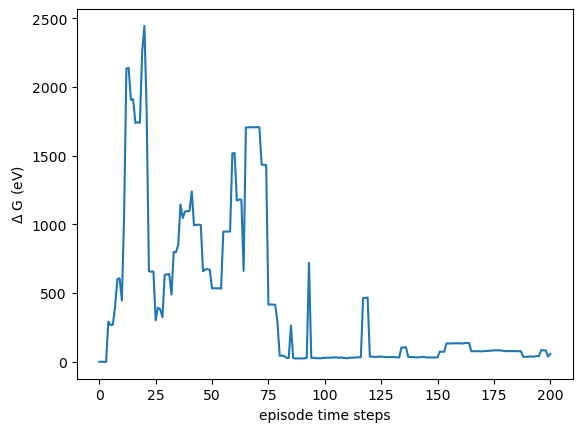

1 ../result_Cu4Pd5Ni6/trajs/10_-0.857054_12.188821_-1242.946297_2_1_11_full.traj
201
0 0.0
1 -1.4295454988961769
2 -1.4295784321337575
3 2.1740432510800343
4 2.8469084999681673
5 391.3317908914581
6 395.641693957621
7 100.664884107704
8 169.3435704624275
9 249.64414561508642
10 432.55822201147487
11 718.593847867516
12 706.3779417751334
13 636.7430394549035
14 640.6790016243352
15 640.6790016243352
16 640.6790016243352
17 238.38579819530025
18 228.42655379035216
19 240.3100793428626
20 397.16706713666525
21 1690.2606065836753
22 1727.2663797981195
23 1690.2606065836753
24 1713.8849621764884
25 1718.688751900748
26 1566.680567065191
27 2166.740523472974
28 2167.3499682050438
29 1545.6832856500614
30 328.4682137544959
31 515.3410632282207
32 515.3410632282207
33 517.5324138588157
34 661.2556414285431
35 873.5913811142036
36 796.2184776424626
37 603.708294580132
38 796.2184776424626
39 794.0046726107478
40 692.5472352687643
41 696.9849058003214
42 452.1747496780265
43 696.9849058003214
44

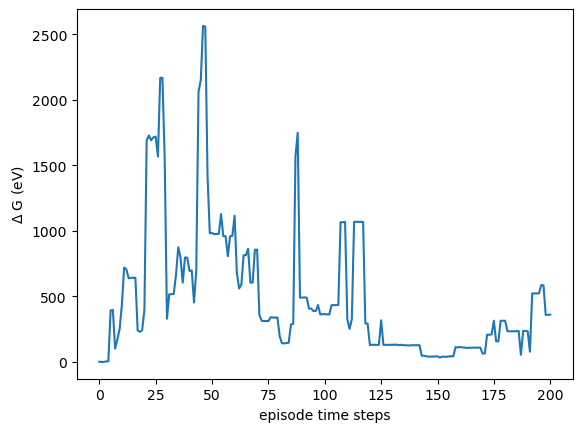

2 ../result_Cu4Pd5Ni6/trajs/10_0.000000_13.118112_-2140.000000_0_0_11_full.traj
201
0 0.0
1 3.4758796703702703
2 6.107775765383819
3 8.92651942218327
4 9.454348470531338
5 5.931644445709695
6 9.454348470531341
7 211.02326621064398
8 1560.3404300424652
9 1563.0439155572258
10 1865.9610917141222
11 1869.4427189041228
12 1874.591827517103
13 1875.292120026846
14 1875.735168019829
15 1388.1180942593048
16 1387.6753858779489
17 1383.6286073186254
18 2748.587035068497
19 3036.626770060959
20 3026.9570563760617
21 877.2974036829122
22 872.9507518578806
23 870.7625424825939
24 868.7017939945393
25 685.9350360430606
26 685.4501340871341
27 689.2770969940071
28 917.5907398534948
29 1008.3768950246999
30 1012.8393492388846
31 1013.313012394086
32 1602.0206114962489
33 1656.9995874988567
34 1658.2920311964922
35 1658.2920311964922
36 800.6764347128931
37 799.4267181054698
38 799.6659478799731
39 1213.5491331152791
40 1368.8843698799506
41 1368.8843698799506
42 1370.1152077823417
43 1370.1160723680

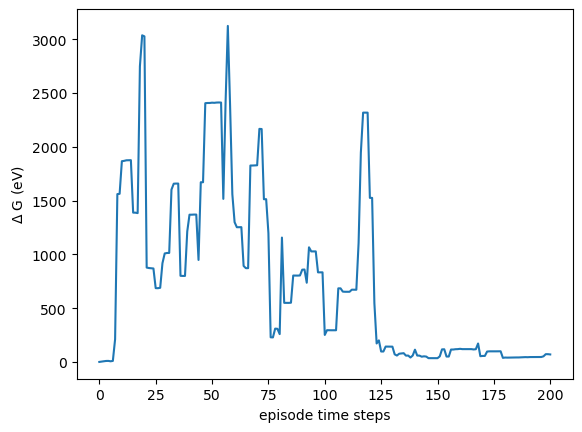

3 ../result_Cu4Pd5Ni6/trajs/10_0.000000_12.931949_-2110.000000_3_0_11_full.traj
201
0 0.0
1 0.0008076787732189672
2 0.0001562260207670363
3 -0.00027758829956070485
4 3.0473034830522288
5 5.591881598602104
6 8.960923065581454
7 12.14233382969061
8 14.64706329605185
9 15.564375721829503
10 97.52306036345085
11 101.43767131795327
12 101.73334942153795
13 104.62979080859242
14 93.03961613305465
15 22.67659872066047
16 25.309187421354263
17 24.173570662659177
18 24.23931658762604
19 31.321539279517662
20 23.047785490098175
21 22.273344764524676
22 22.99332995517442
23 26.21810890096619
24 25.507587319300765
25 24.47157472942612
26 378.3177321367246
27 554.1801887195202
28 554.7750278170022
29 555.4280994575803
30 554.5466050321913
31 554.8378828647882
32 554.8378828647882
33 557.2166490175358
34 908.3760121858995
35 272.78426753212
36 273.1761320645336
37 165.04884885940626
38 65.73982781291755
39 68.80876569222002
40 41.829580898670784
41 43.240399509051485
42 43.240399509051485
43 44.5332

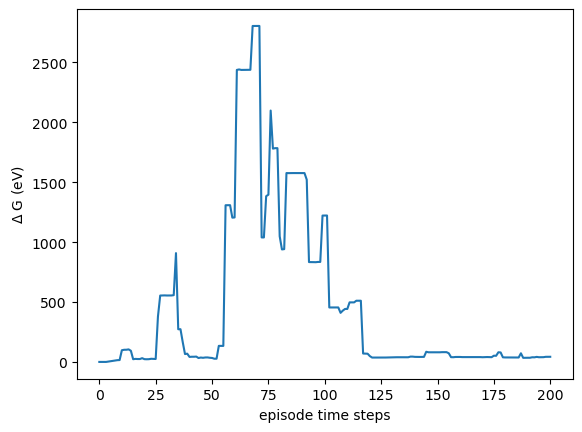

4 ../result_Cu4Pd5Ni6/trajs/10_-1.308319_13.044457_-781.681350_3_1_11_full.traj
201
0 0.0
1 258.0135002491419
2 262.0560509822152
3 1099.8876689617575
4 1143.4294770083038
5 -0.1352497561313868
6 -0.13520446937366692
7 -0.3606554768096153
8 3.0557200979726904
9 6.423909299282144
10 216.84330382789543
11 113.60698517514354
12 117.2793582909272
13 405.2978744554398
14 402.1257063160765
15 162.12665278789035
16 164.62038956302186
17 243.7940081612816
18 247.10121881069918
19 251.5483097313248
20 1099.0512792207924
21 1103.3062864101732
22 1099.0512792207924
23 1099.3474713509634
24 1099.848850083892
25 1133.2993207484626
26 1136.9723332468743
27 1133.5961404372918
28 1411.4846690119978
29 1412.4339502175667
30 1417.2920126007964
31 1418.390877969505
32 1832.7385211119447
33 1077.7258828611955
34 1077.8226255336974
35 842.4945825467817
36 841.3764287428756
37 916.2228004404423
38 841.3764287428755
39 841.3764287428755
40 1064.9345890633
41 1060.7977528768363
42 679.2060381721778
43 683.110

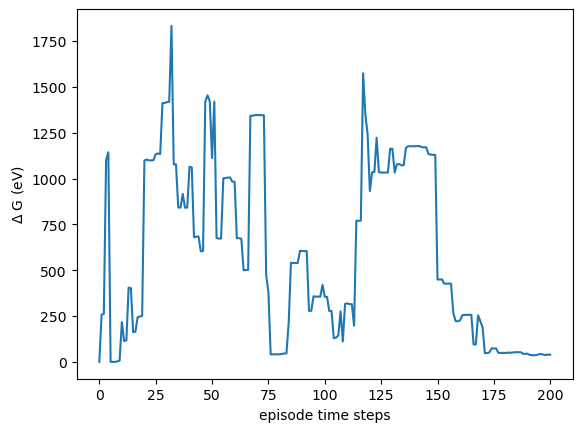

5 ../result_Cu4Pd5Ni6/trajs/10_-1.797647_13.570350_-342.353480_2_1_11_full.traj
201
0 0.0
1 -0.00021540313997014948
2 466.8935339256627
3 1023.1105425536073
4 -0.1302287184378521
5 328.3168484607864
6 332.48986123450237
7 55.91748956475188
8 448.9547277007014
9 445.09092185504204
10 51.965576998922295
11 54.54548796263162
12 58.413838918134154
13 113.64662850932345
14 114.8569141882337
15 84.36847054094017
16 260.32890818646143
17 250.56552663820693
18 75.20386327592684
19 119.14805661229363
20 121.52473473986024
21 124.27861509948929
22 125.0320051218419
23 127.749663440544
24 128.09622346986268
25 128.10043684525624
26 128.61565019578788
27 131.49163537948368
28 132.21870246871262
29 132.8801164504726
30 132.21870246871262
31 129.49544671114373
32 125.9679588851026
33 93.56879592871024
34 93.56391055565467
35 93.86424445867269
36 35.64879832633668
37 35.67702602594758
38 35.64879832633668
39 35.67702602594758
40 35.67702602594758
41 110.49407478209014
42 113.18850829030464
43 110.494

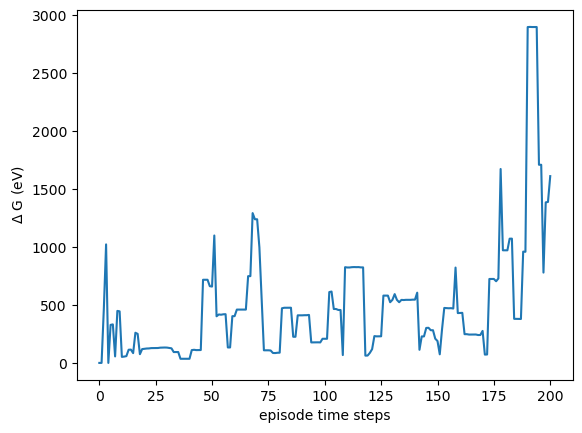

6 ../result_Cu4Pd5Ni6/trajs/10_0.000000_12.840140_-2100.000000_0_0_11_full.traj
201
0 0.0
1 250.45613926149662
2 254.49971422746154
3 258.8289804820975
4 262.06002914228696
5 80.19039136267543
6 81.3117177518162
7 79.7145906985875
8 81.963917479775
9 80.34457783243651
10 13.921881273005773
11 15.713775864674346
12 15.80875545630046
13 15.80875545630046
14 238.4655603459387
15 241.25835319941783
16 239.48423221105438
17 477.0148104641175
18 239.48423221105438
19 241.73495373856673
20 50.324366520593586
21 50.71879255912552
22 24.925750297232913
23 22.064541508729302
24 22.29362994429275
25 19.995230053760014
26 286.337377473258
27 289.36513112340333
28 565.029596476089
29 289.36513112340333
30 342.47208041608764
31 345.8249534015471
32 291.7516965509652
33 72.0865482766281
34 72.60027149553179
35 73.07150625072806
36 71.36081360034703
37 73.50169977465232
38 74.95492613561832
39 421.6458713882758
40 523.9685228859838
41 527.0934795305487
42 526.6470949804481
43 526.6485140956753
44 527.

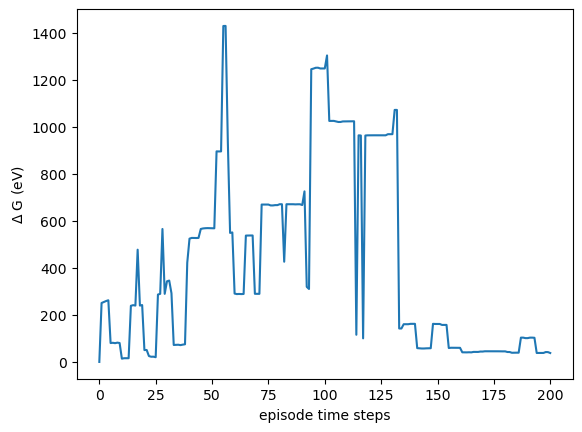

7 ../result_Cu4Pd5Ni6/trajs/10_0.000000_13.073728_-2050.000000_0_0_11_full.traj
201
0 0.0
1 3.5018940341769547
2 135.32502251702752
3 136.1774407858113
4 214.183023550109
5 217.47525031341894
6 221.00658341200898
7 21.9719270466714
8 25.205130446611403
9 28.362037975724103
10 136.6585005936556
11 138.0940622569774
12 141.042943624362
13 955.1439818635134
14 1009.5106546562162
15 1009.6234276712265
16 1012.0828927840057
17 335.0410860801266
18 1012.0828927840013
19 1007.3158978461206
20 371.8217029212979
21 375.45600059039793
22 228.42322422944918
23 230.38152162749554
24 231.3678945796174
25 45.076234292837285
26 46.91944221751574
27 579.7990191306664
28 579.7990191306664
29 579.7990191306664
30 581.0821361495396
31 580.4941315647326
32 581.403174766899
33 581.436714102831
34 49.63821904664883
35 50.30268954439245
36 50.30268954439245
37 51.03199624194801
38 51.10073326696977
39 51.10073326696977
40 52.75717660752032
41 52.49252374838687
42 82.65029829996944
43 82.8436875404275
44 82.9

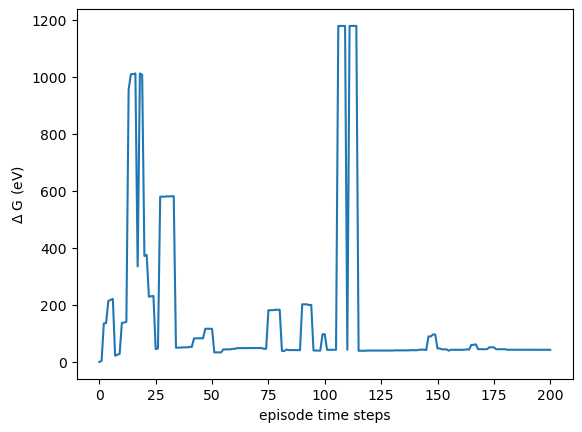

8 ../result_Cu4Pd5Ni6/trajs/10_-0.614775_12.635496_-1485.224856_1_1_11_full.traj
201
0 0.0
1 0.1856717617711805
2 3.520107066262881
3 6.964115584530784
4 9.0622277411881
5 425.3518372952631
6 468.2906084880059
7 472.2810646358389
8 860.711274535051
9 818.7746535044927
10 469.9479216058978
11 818.7746535044936
12 383.22912873551445
13 404.33377123770305
14 68.7844067629747
15 182.74322290590683
16 232.06034236187878
17 181.5157566720913
18 55.148940416427855
19 58.40702532718807
20 59.08790852936426
21 518.0054288740383
22 237.41132511851438
23 237.8288067241837
24 566.1620529979239
25 567.920464238326
26 396.80301492501013
27 395.06104036873563
28 394.36369738633476
29 89.28893260673229
30 469.57910944073654
31 468.9378302747018
32 96.23005955851224
33 264.24160185239737
34 267.3422181940631
35 266.8250144222611
36 263.4965840341596
37 293.4500221877584
38 296.9851874203132
39 293.4500221877584
40 297.3909436278763
41 297.9632885629436
42 267.67954785848497
43 32.58501342351057
44 33.3

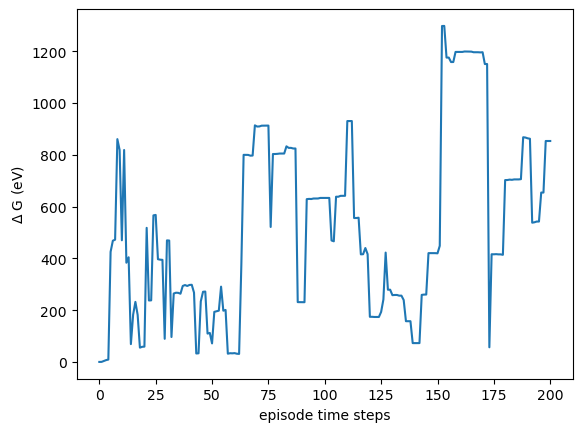

9 ../result_Cu4Pd5Ni6/trajs/10_0.000000_13.925385_-2020.000000_0_0_11_full.traj
201
0 0.0
1 3.0801002390905747
2 6.5322989198895645
3 270.5767981788727
4 274.0150459323868
5 426.2119323232276
6 429.2147368796515
7 458.4401516159683
8 431.33224133319317
9 433.8795109574128
10 468.10918238621616
11 465.23644025991035
12 462.33589015784986
13 428.0215840945813
14 430.68250941494546
15 431.3876832110199
16 433.2925684693229
17 441.18312182397614
18 442.3538405555386
19 564.4896594715656
20 563.7624923359607
21 564.2348976371383
22 567.123191616579
23 570.3608409397297
24 573.3070098564119
25 574.0792909443337
26 574.2717807414092
27 159.08368749513787
28 158.32522928214848
29 39.466250203638936
30 37.388654049390254
31 37.60050453854817
32 39.12116426078581
33 41.78317793266875
34 42.41281477400985
35 42.41281477400985
36 42.5576547800807
37 41.930194364744374
38 42.5576547800807
39 42.5576547800807
40 44.34639534007935
41 44.43879499578127
42 44.47330901079143
43 44.47330901079143
44 171.

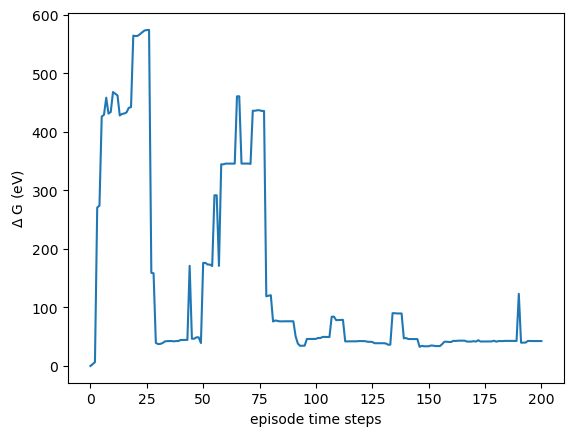

10 ../result_Cu4Pd5Ni6/trajs/10_-1.760279_13.098411_-239.720776_2_1_11_full.traj
201
0 0.0
1 -1.4443279060589465
2 -1.4442492195104535
3 2.0492938111884023
4 71.940119183003
5 75.20237396235274
6 77.4943109124088
7 80.69017278266197
8 83.9105391199028
9 86.3490913859788
10 87.99104845622267
11 36.552918369029996
12 24.818869282644165
13 25.006010918415384
14 25.449354635272726
15 25.449354635272726
16 27.786647048761367
17 27.59951536197839
18 27.103800453087764
19 503.02401137239394
20 506.4972107559745
21 503.40393517633595
22 504.19309738679476
23 504.50942620690944
24 504.50942620690944
25 500.9996652897521
26 500.9996652897521
27 510.35128985958136
28 500.9996652897521
29 501.5426525784618
30 613.3727377453681
31 505.881222827941
32 33.74064928149953
33 132.54346335195908
34 135.09100260125135
35 136.33648833342804
36 136.33648833342804
37 137.85382180806315
38 140.37030014928158
39 140.37030014928158
40 140.9387581781755
41 140.9387581781755
42 143.98121752422853
43 143.988274767

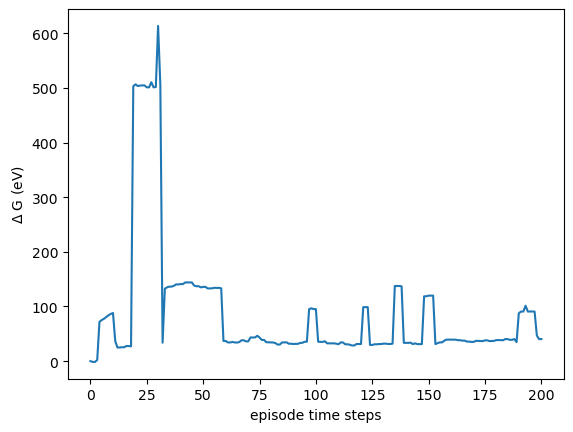

11 ../result_Cu4Pd5Ni6/trajs/10_0.000000_12.899136_-2100.000000_0_0_11_full.traj
201
0 0.0
1 2.898098750049151
2 118.13165510554823
3 164.0989561832087
4 166.25580310341985
5 169.65604017344344
6 173.10380101031393
7 176.364599980859
8 177.09563770255784
9 239.81156021071803
10 127.84248743710059
11 431.11681312128746
12 431.7959066545418
13 832.2373830305933
14 1292.6843122896994
15 752.6947828715819
16 749.5325908633924
17 793.6931910203638
18 794.2346815386869
19 2034.512000361789
20 2034.6032148347176
21 2034.6032148347176
22 1974.998267630314
23 1971.3799352371439
24 508.32690317321436
25 439.7555964501452
26 508.3269031732139
27 327.67202276301254
28 327.79623468876565
29 128.63402801487052
30 548.0287705201217
31 539.9012998366901
32 1145.704871128395
33 1139.2333001923248
34 703.2196962420588
35 332.30896595760294
36 332.30896595760294
37 335.0793718025259
38 385.51040317231076
39 248.45365733620207
40 211.53672727883406
41 252.2971551610505
42 252.28356683628687
43 204.6433807

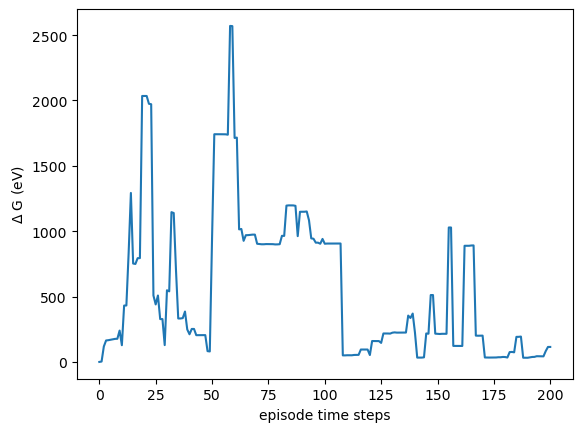

12 ../result_Cu4Pd5Ni6/trajs/10_0.000000_11.912377_-2080.000000_2_0_11_full.traj
201
0 0.0
1 0.10588824431537347
2 -0.9222085111055236
3 2.542105679593039
4 3.2705880217310295
5 6.565346693385994
6 384.2603447233838
7 693.4130379333906
8 696.4654018666366
9 1150.8401952031222
10 2060.3663995631987
11 1438.3543280976144
12 681.7205494351647
13 607.6056252063203
14 675.5363112356141
15 677.9221472828657
16 642.0809634969293
17 942.2145489287323
18 994.7242733871728
19 995.4632834028228
20 692.0684817400131
21 596.2794947684608
22 692.0684817400131
23 694.3585737921389
24 692.0684817400131
25 406.5489995779942
26 408.2344010359489
27 675.879942252978
28 675.7489628515896
29 1232.934206451102
30 1228.818228399792
31 678.5308815509159
32 681.8228537871947
33 926.4470776104546
34 928.8394025347601
35 792.4723588492587
36 928.8394025347571
37 836.0024665980349
38 836.8785875515256
39 547.0381869358395
40 547.6584776581658
41 551.1443832211476
42 319.5025776401844
43 321.2699600021455
44 322.6

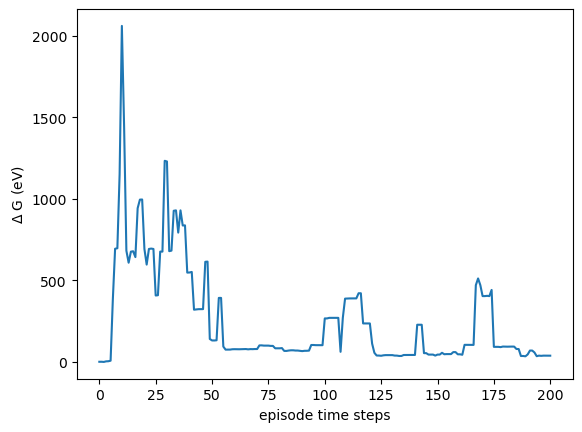

13 ../result_Cu4Pd5Ni6/trajs/10_0.000000_12.674931_-2050.000000_8_0_11_full.traj
201
0 0.0
1 0.00016552945557357646
2 0.00019931809814011103
3 0.00010750606307396993
4 6.661626027870682e-05
5 0.00011214932259484556
6 0.00016928116343528643
7 -4.7765966035839824e-05
8 7.059262872921579e-05
9 3.24174617306457
10 130.90344831522418
11 133.70638895872298
12 137.04911653677866
13 133.39335736426716
14 135.82342259821613
15 273.76943929455024
16 277.08070686086415
17 280.42976276218246
18 153.6727856408554
19 154.17449282672922
20 156.31471134019773
21 159.02577567860675
22 162.38359673936787
23 163.22544947910757
24 24.467684298342444
25 163.22544947910757
26 165.79573256883813
27 165.89259858488506
28 169.02842065294007
29 169.09224240267125
30 168.70788791726793
31 169.91626336638217
32 32.36714432553747
33 29.76377045003189
34 28.580399567205287
35 28.603418514231972
36 31.45141007317825
37 91.213991060788
38 91.15248140598432
39 91.64392488263628
40 91.70543453743997
41 91.7054345374399

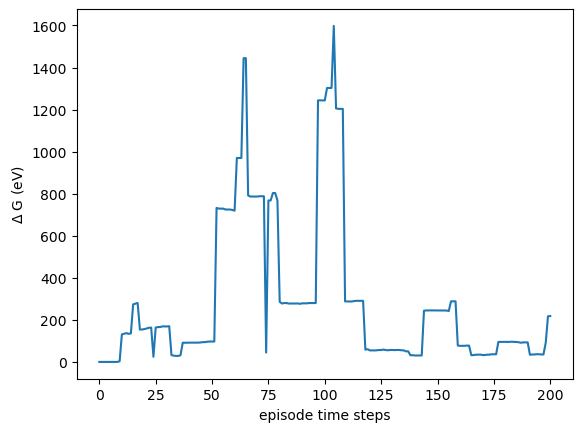

14 ../result_Cu4Pd5Ni6/trajs/10_0.000000_11.383932_-2020.000000_0_0_11_full.traj
201
0 0.0
1 3.001984464532045
2 6.1955716686649716
3 8.411388692929421
4 236.25434995222238
5 16.695779304615215
6 19.70611092818785
7 22.657663664575086
8 25.105722201871846
9 26.2846588404369
10 26.407790679430303
11 30.306009825580656
12 30.827731787138408
13 30.710845344302168
14 29.666466161092938
15 33.29204815255498
16 32.423169840926505
17 35.81853193977092
18 38.49344898318587
19 39.46872111200997
20 671.6125146931286
21 672.3029974076956
22 673.5837179178335
23 673.6387091250164
24 677.5892342275306
25 677.600878285767
26 677.600878285767
27 677.600878285767
28 680.1633132098374
29 680.1633132098374
30 678.9244920517731
31 678.9244920517731
32 679.5030724573515
33 45.973630915188835
34 46.09501931782188
35 46.159460021924545
36 46.32825944110557
37 46.32825944110557
38 46.32825944110557
39 46.65871865277269
40 46.65871865277269
41 46.65871865277269
42 46.65871865277269
43 46.65871865277269
44 45.

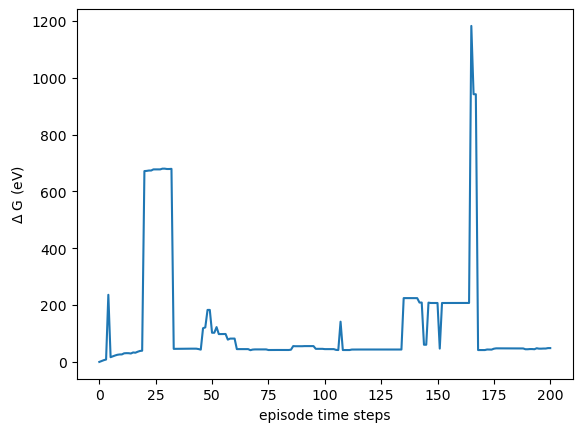

15 ../result_Cu4Pd5Ni6/trajs/10_-1.343215_12.694346_98.129563_2_2_11_full.traj
201
0 0.0
1 -1.37759478187437
2 1.6352106967042275
3 4.855590665692258
4 8.114315663239282
5 10.625728848737516
6 30.97490087430564
7 28.54680165566718
8 27.744228259100275
9 64.52555150053583
10 60.82162088615061
11 565.9294344022438
12 973.0132350194374
13 1491.6641163451334
14 1494.8324658650802
15 1495.2782386867727
16 1123.2390902552338
17 472.74784514081796
18 298.77877709262833
19 299.97276845251815
20 291.72342279417126
21 295.767331735663
22 297.30802246519124
23 50.25222326104044
24 52.698402859760606
25 52.78120487872171
26 282.5062436468601
27 442.29600674970953
28 803.9456368388722
29 472.1469097653901
30 629.9230606643265
31 627.4289666151687
32 626.106191986333
33 618.9472379241577
34 615.4019985828339
35 397.34175789019037
36 395.88405914895293
37 395.80117689186056
38 594.0513003382719
39 592.334990151115
40 460.7275950394041
41 489.8601482092223
42 820.3317650705769
43 1133.6505831661245
44

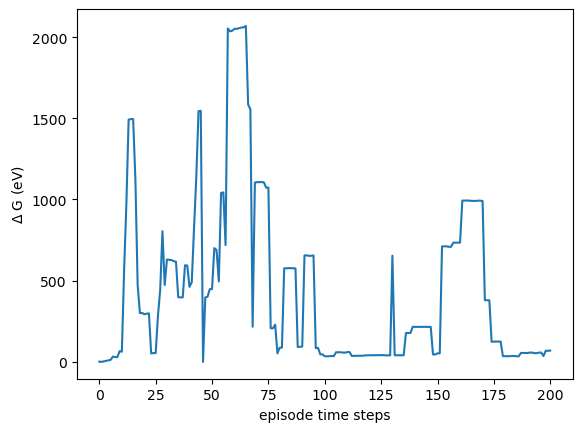

16 ../result_Cu4Pd5Ni6/trajs/10_0.000000_12.347692_-2180.000000_1_0_11_full.traj
201
0 0.0
1 -0.0002326857434091778
2 3.3595982531327593
3 479.62159419034623
4 483.26938406576124
5 1086.4944479827097
6 1089.43910699955
7 1410.382594855438
8 1414.323561829771
9 2035.6215728665861
10 2036.2017051840119
11 2042.418113130975
12 2043.2942364139565
13 1347.3910644554896
14 1351.4590776572938
15 1037.797867421791
16 1038.0674552969822
17 1036.4475595370257
18 1037.6415123753334
19 1054.0093923401844
20 1054.4549663480918
21 523.7484922425301
22 523.8457036697916
23 733.6929349144089
24 528.5645108734043
25 658.172195776644
26 656.1123847628921
27 651.5880480106357
28 656.1123847628921
29 704.8759886230275
30 704.5976928202476
31 700.4843768202436
32 700.5539173363798
33 699.388936753918
34 837.4334756012561
35 960.4003797413545
36 674.9971311238914
37 850.0528218764273
38 846.2376922382
39 1378.0084790834771
40 1381.119677096199
41 1998.2317006168269
42 1546.494499005131
43 1884.2820145477547

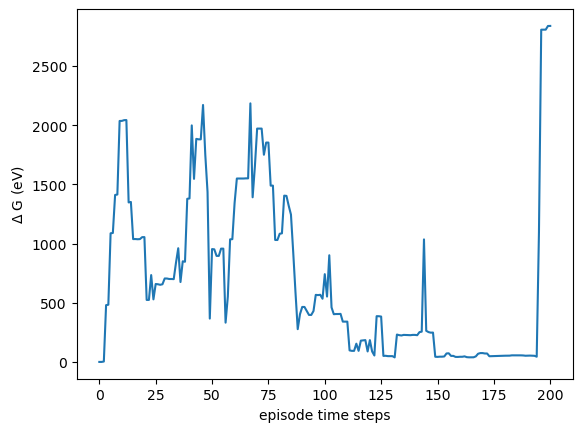

17 ../result_Cu4Pd5Ni6/trajs/10_0.000000_13.072575_-2050.000000_1_0_11_full.traj
201
0 0.0
1 6.584041858914702e-05
2 3.2568983295902765
3 63.22464698451872
4 3.2568983295902765
5 6.073129723975589
6 106.16450699901327
7 109.93311649697263
8 2031.9239698654753
9 2035.3528096379562
10 2031.3488562816053
11 2078.734526997728
12 2081.688807843205
13 2558.4771194532427
14 2843.8992572520356
15 2844.841352028917
16 2848.9106019839146
17 2431.2999076359993
18 2431.3550874377024
19 2558.4073627371226
20 2561.230387780129
21 2561.552855942231
22 2558.814833698714
23 2553.882331061269
24 783.4917512853534
25 784.2540603452223
26 787.2890618003192
27 764.2340967083873
28 764.2340967083873
29 121.62210834117519
30 121.62210834117519
31 44.33660818699793
32 46.51606040026144
33 43.992139247536564
34 43.93251798407119
35 43.992139247536564
36 106.28344502969604
37 153.7268488545632
38 153.7268488545632
39 150.29360631374672
40 153.06359169780845
41 73.62314170111433
42 86.58700623785947
43 83.665106

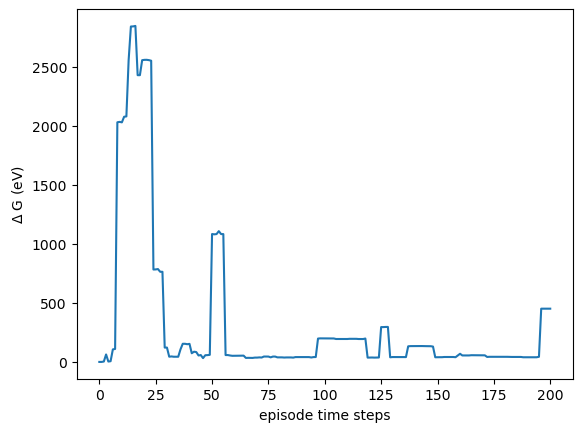

18 ../result_Cu4Pd5Ni6/trajs/10_-0.516942_12.402927_-1573.058128_2_1_11_full.traj
201
0 0.0
1 -1.1915699418780896
2 2.0403958191223257
3 -1.1915699418780896
4 1.9901336847769286
5 5.518165910298189
6 268.48938286283357
7 272.57330784487704
8 272.9415596507581
9 507.7322443301384
10 2008.2148800464365
11 507.7322443301384
12 256.5452252573925
13 107.05684346993904
14 73.48566491785998
15 113.2443812932292
16 116.71060337732935
17 518.0882927053921
18 518.0898018553155
19 509.18034051585244
20 505.65896829612154
21 507.65009346621275
22 511.1993534183706
23 727.7102553739996
24 728.0549399977295
25 797.3392487857147
26 797.3392487857147
27 1940.553787301181
28 1338.4457597002545
29 1642.6299017993945
30 2063.498980322529
31 2067.237648748493
32 1785.1320185346449
33 1486.1665994530535
34 1485.223061138964
35 1485.6502452960938
36 1606.690874972628
37 1837.5640657196475
38 1837.5640657196475
39 2101.389362459435
40 2033.5909756757671
41 2036.1149928987436
42 1899.6215922578288
43 1899.809

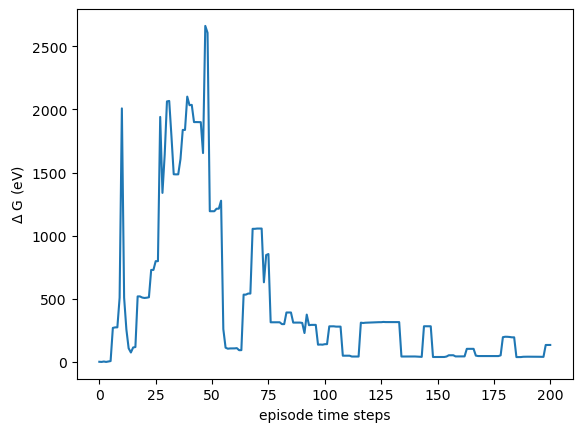

19 ../result_Cu4Pd5Ni6/trajs/10_0.000000_13.590850_-2060.000000_5_0_11_full.traj
201
0 0.0
1 5.127368412871647e-05
2 2.9873696457016763e-05
3 0.00019368618306359053
4 6.224462335424619e-05
5 3.7264384006847884
6 3.618782628400652e-05
7 3.4541347204796704
8 6.464189678619935
9 76.59216507172421
10 69.9365835472637
11 73.59557096912408
12 70.37473499961472
13 388.1600100537057
14 388.76860718515496
15 331.05435681141455
16 334.7271193105218
17 334.7271193105218
18 913.6304052723063
19 914.157654862565
20 917.7395449209432
21 920.6589652156985
22 924.9179307441501
23 925.3583442161402
24 925.3583442161402
25 921.868047660436
26 922.2080381767399
27 922.2080381767399
28 926.487003947964
29 930.1130246571898
30 929.6995494239856
31 1296.116055072077
32 1296.116055072077
33 1543.0414798929107
34 1146.4941429633031
35 1446.1231929229768
36 1012.304361871489
37 1012.8535896646707
38 567.8408985856762
39 567.8408985856762
40 569.9949744564003
41 229.20899087008854
42 238.82442731647888
43 240.2

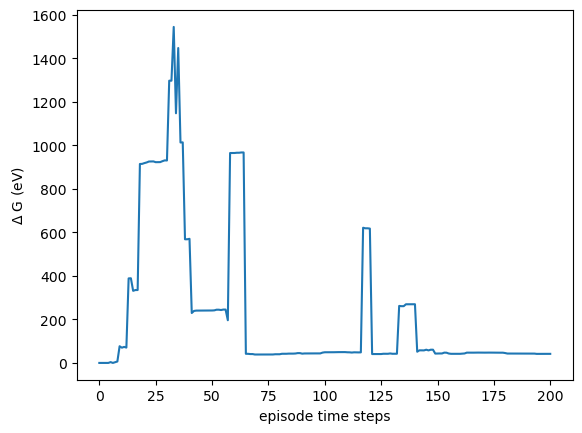

20 ../result_Cu4Pd5Ni6/trajs/10_0.000000_12.502547_-2020.000000_6_0_11_full.traj
201
0 0.0
1 2.608005633973457
2 49.60885934531573
3 -0.6766587498110237
4 -0.6771310631287992
5 -0.984772395889074
6 -0.984642630427965
7 -0.9849036830761921
8 -1.355093492772518
9 1.98038958748314
10 29.203270495370674
11 32.398426059325594
12 72.68574798945912
13 204.60444681091099
14 248.8352837516773
15 251.33793396119188
16 809.5295857537866
17 654.1583261693635
18 1042.5303963408087
19 971.5667977006002
20 974.0372858149018
21 979.9787896098868
22 756.1150071650194
23 759.2416918595991
24 451.22297619722565
25 452.0710900945889
26 452.0995869418404
27 454.7135698514644
28 455.2518485866335
29 381.88174157263745
30 379.26189098771533
31 378.6460179940183
32 375.4886181026233
33 135.75673283958355
34 133.29260428493308
35 919.0737991603155
36 919.402468659122
37 921.7568803236254
38 939.7226683326802
39 259.6012554070486
40 259.91310829289375
41 286.02968781247006
42 259.91310829289375
43 113.138179838

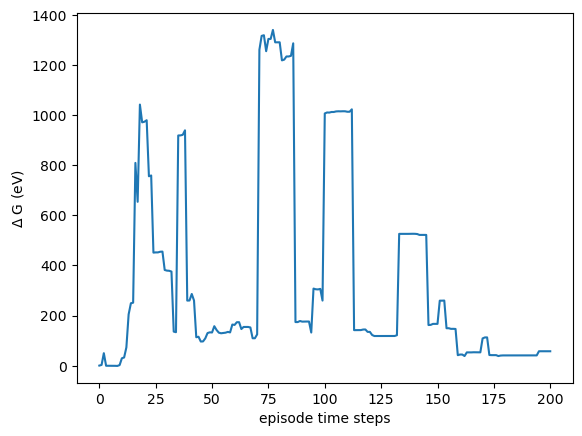

21 ../result_Cu4Pd5Ni6/trajs/10_0.000000_11.876837_-2020.000000_3_0_11_full.traj
201
0 0.0
1 -4.319804867058963e-05
2 -0.0002274741361123489
3 -8.320570967157437e-05
4 2.7829615651241966
5 81.8632342642066
6 82.85484822621706
7 86.3714364995425
8 87.40851328044981
9 11.040860874663029
10 480.3431394217903
11 483.9185537404332
12 487.9688792801862
13 25.748935295227206
14 27.05300138119511
15 27.14289072184475
16 27.89190687561299
17 68.32083436208147
18 61.62534772066323
19 63.94314676223284
20 63.85027220194476
21 66.58618468789282
22 67.10102953948156
23 33.369609124520835
24 34.50213662911723
25 35.71841008133105
26 33.70282895152386
27 34.053922273737584
28 27.79505156406971
29 170.92925762568115
30 173.5773608529389
31 177.15891115098037
32 177.63043169003322
33 532.62563573902
34 533.155446784725
35 531.4271454263232
36 531.8419946964339
37 533.8225424032578
38 533.8532252790965
39 174.27888107378027
40 177.43437795791056
41 177.64423923042773
42 177.43437795791056
43 175.1474614

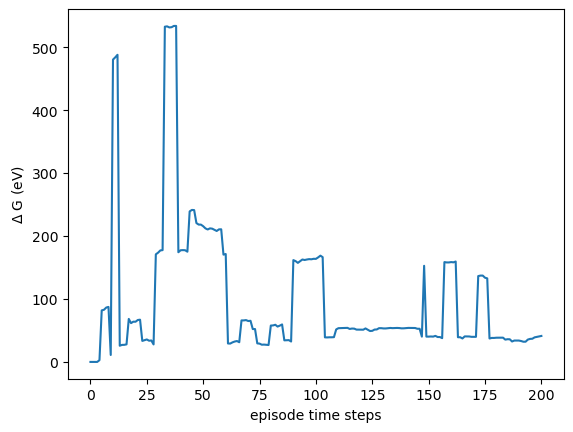

22 ../result_Cu4Pd5Ni6/trajs/10_0.000000_11.848576_-2030.000000_0_0_11_full.traj
201
0 0.0
1 3.4485806723656314
2 320.18798657470256
3 323.2376042459997
4 326.86410776149813
5 19.998407368411133
6 20.6749430403133
7 220.01755089805644
8 220.73208727413464
9 223.33038333558238
10 220.73208727413464
11 16.926370861886312
12 13.971279259884678
13 13.971279259884678
14 16.914251993891735
15 17.498308686067812
16 21.08403242684476
17 23.858900238154558
18 26.204010250058825
19 22.718532929370905
20 22.165480754200058
21 49.41106522079275
22 46.542732648564325
23 47.14402989268372
24 47.670890305812065
25 47.670890305812065
26 50.554886712531385
27 53.44013594278627
28 56.69254739231975
29 40.29862517138672
30 37.27008796030917
31 34.26745546284067
32 34.91524818805206
33 34.46397632346397
34 25.895760390915672
35 85.80047149249782
36 271.7127978373644
37 210.9490107562721
38 211.21995446459508
39 212.65889731816983
40 149.64935735065504
41 472.4180154681916
42 474.8466177161629
43 152.78946

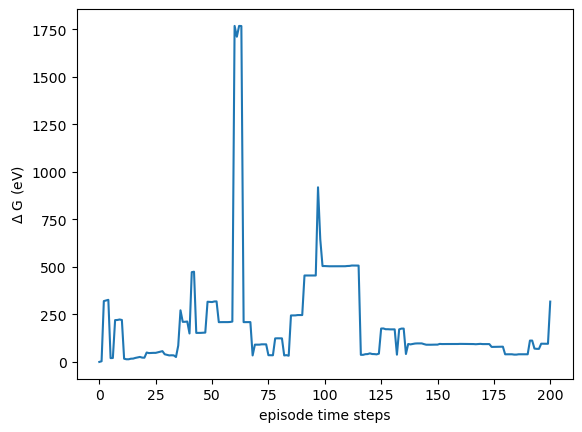

23 ../result_Cu4Pd5Ni6/trajs/10_0.000000_13.079403_-2030.000000_0_0_11_full.traj
201
0 0.0
1 3.2621954084502764
2 5.242801211377701
3 161.96152914204836
4 173.07586268213961
5 176.25844706291326
6 1005.1941602448115
7 1006.6277992951252
8 1008.4027179618588
9 1010.912094369451
10 1008.4027179618588
11 858.9300171382201
12 1008.4027179618596
13 1006.627799295126
14 853.3710825493806
15 853.8129922846894
16 854.139778271731
17 856.6505505927734
18 909.5706009529407
19 856.6505505927734
20 24.933050033393208
21 27.498891849549743
22 176.82199438404942
23 177.61263453096416
24 177.09271513594987
25 177.8685552391636
26 178.40406714713518
27 889.7949511104744
28 944.9943048327575
29 944.472739648913
30 944.0894961710604
31 944.675256228702
32 945.3517401774144
33 492.35268732759204
34 492.3732164708112
35 431.8278643758104
36 431.8278643758104
37 431.8278643758104
38 426.42364499188653
39 425.67183008656133
40 183.94921351190735
41 425.67183008656156
42 507.9692077245764
43 508.627614589155

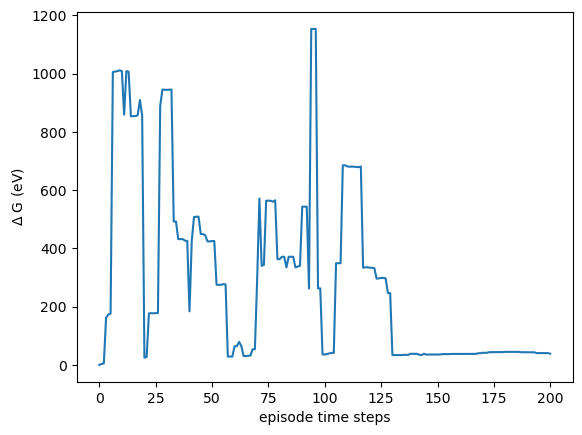

In [4]:
folder_path = '../result_Cu4Pd5Ni6/trajs/'
reg_selection = '10_*'
extension = '.traj'
traj_file_path = folder_path + reg_selection + '.traj'
for i, file in enumerate(glob.glob(traj_file_path)):
    print(i, file)
    generate_traj_plot(file, cif = False)
    

201
0 0.0
1 2.608005633973457
2 49.60885934531573
3 -0.6766587498110237
4 -0.6771310631287992
5 -0.984772395889074
6 -0.984642630427965
7 -0.9849036830761921
8 -1.355093492772518
9 1.98038958748314
10 29.203270495370674
11 32.398426059325594
12 72.68574798945912
13 204.60444681091099
14 248.8352837516773
15 251.33793396119188
16 809.5295857537866
17 654.1583261693635
18 1042.5303963408087
19 971.5667977006002
20 974.0372858149018
21 979.9787896098868
22 756.1150071650194
23 759.2416918595991
24 451.22297619722565
25 452.0710900945889
26 452.0995869418404
27 454.7135698514644
28 455.2518485866335
29 381.88174157263745
30 379.26189098771533
31 378.6460179940183
32 375.4886181026233
33 135.75673283958355
34 133.29260428493308
35 919.0737991603155
36 919.402468659122
37 921.7568803236254
38 939.7226683326802
39 259.6012554070486
40 259.91310829289375
41 286.02968781247006
42 259.91310829289375
43 113.13817983868523
44 115.1855388503052
45 96.1378729540024
46 96.42964891818538
47 108.696811

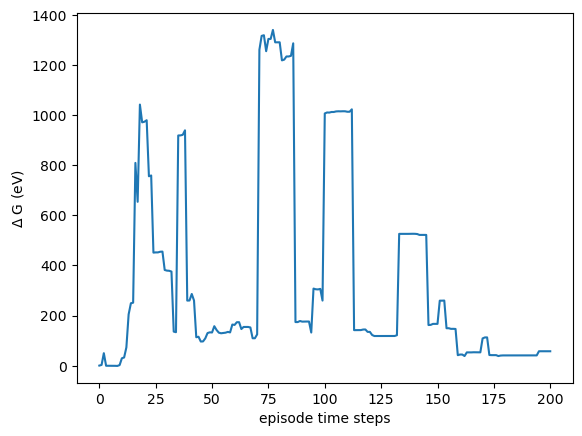

In [10]:
traj_fname = '../result_Cu4Pd5Ni6/trajs/10_0.000000_12.502547_-2020.000000_6_0_11_full.traj'
generate_traj_plot(traj_fname, cif=True)

0 ../result_Cu4Pd5Ni6/trajs/2600_-1.912440_13.767608_6174.723236_7_5_11_full.traj
10
0 0.0
1 -5.288258705604676e-06
2 0.424446290974144
3 0.3291934582084064
4 232.7947909933393
5 588.8297503849154
6 1.0094624597413429
7 1.2817796767096326
8 0.8879874558481404
9 0.06395493232036742


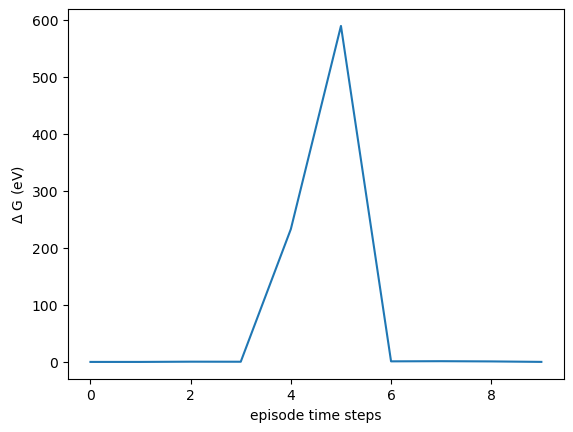

1 ../result_Cu4Pd5Ni6/trajs/2600_-2.294508_13.590850_7557.930187_5_5_11_full.traj
10
0 0.0
1 0.13483076577643516
2 -0.3013718145908726
3 -0.43704649183172606
4 453.4642138054703
5 722.0544810638904
6 1150.9794214602823
7 -1.4863899906446907
8 343.3251131107776
9 -1.4913421035858452


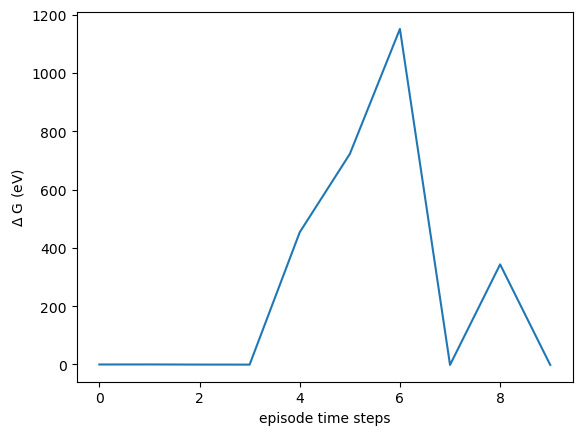

2 ../result_Cu4Pd5Ni6/trajs/2600_-2.524297_13.925385_7448.310727_8_5_11_full.traj
9
0 0.0
1 -0.05912457020421691
2 -0.1687322074044566
3 -0.16864044519417654
4 -0.1687695254959749
5 -0.6235695299766331
6 -0.6235385351935179
7 -0.7775536339628033
8 -1.6934492308915878


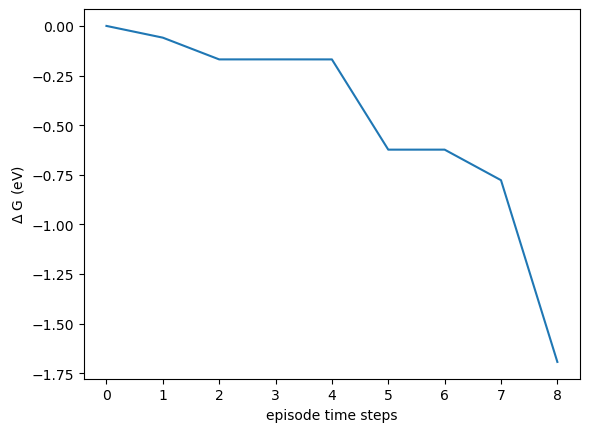

3 ../result_Cu4Pd5Ni6/trajs/2600_-1.912192_13.118112_5477.375945_8_5_11_full.traj
12
0 0.0
1 -0.5425730452131798
2 -0.5424577075955384
3 -0.5423888011034972
4 -0.5423834835037891
5 -1.1946853696405544
6 -1.4169729794494899
7 430.1988408893268
8 817.4410958971632
9 1250.3841634388996
10 -1.3270156935982698
11 -2.126514707804862


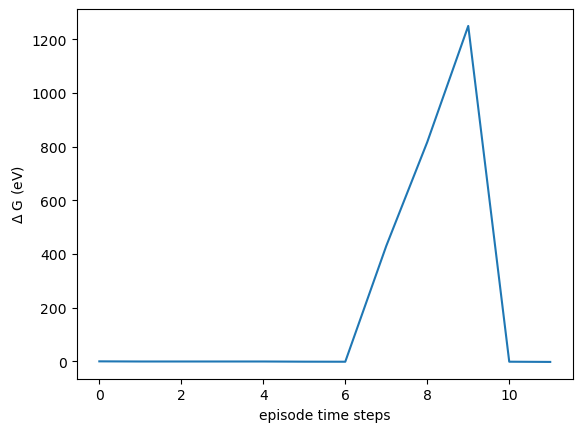

4 ../result_Cu4Pd5Ni6/trajs/2600_-1.804017_13.072575_5606.827617_6_5_11_full.traj
13
0 0.0
1 3.754458721516585e-05
2 0.1067743814031541
3 -0.1418811537539728
4 -1.299948502634134
5 404.7368154003225
6 820.036929199797
7 -0.6504231639466429
8 698.8305637213742
9 1245.9749702735157
10 1853.2213595361416
11 2392.570713761889
12 -1.3329923902530627


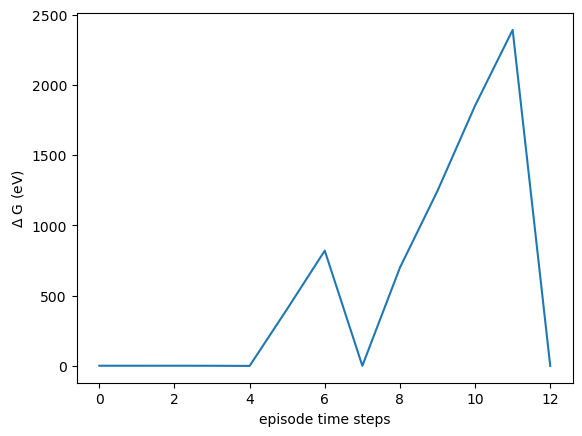

5 ../result_Cu4Pd5Ni6/trajs/2600_-2.237212_13.570350_8135.647601_20_5_11_full.traj
26
0 0.0
1 -0.6166329135784849
2 -0.6165600967736644
3 -0.6165137551558022
4 -0.616520763585438
5 -0.6166760706927992
6 -0.616588573193523
7 -0.6165190428663845
8 -0.6164860878462779
9 -0.6166753483879344
10 -0.6164764005463379
11 -0.6165240205263718
12 -0.6165229509945025
13 -0.6165246617962321
14 -0.6165232601403847
15 -0.6166760544247332
16 -0.6164767108157623
17 -1.3127547160102182
18 354.99157959616525
19 615.141554812673
20 -1.698972966345499
21 495.28252846097024
22 1029.101451301546
23 -1.7533601326921602
24 470.23583788649256
25 -0.5295867137485342


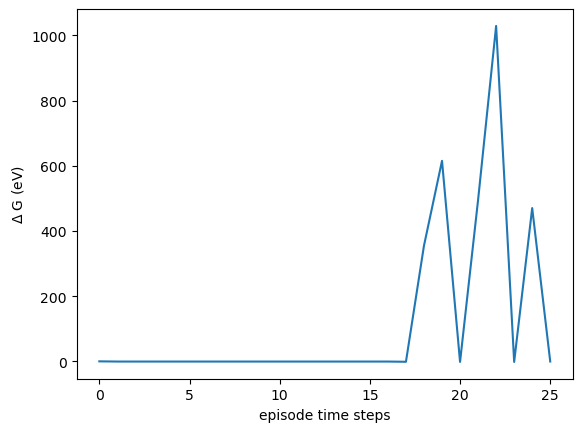

6 ../result_Cu4Pd5Ni6/trajs/2600_-1.847864_13.079403_6749.507106_9_5_11_full.traj
18
0 0.0
1 0.08400755431028628
2 0.031340013241321074
3 323.42356836399875
4 545.3109420246017
5 860.2686565464585
6 -0.8397116527751898
7 455.59463449949214
8 1592.1921094364618
9 -0.7667893160598585
10 -0.7668314749300613
11 -0.76678764007025
12 -0.7667254925264277
13 -0.7667247446678811
14 259.33569764537765
15 1164.6834822881829
16 1584.2050742817394
17 -0.33201819985584535


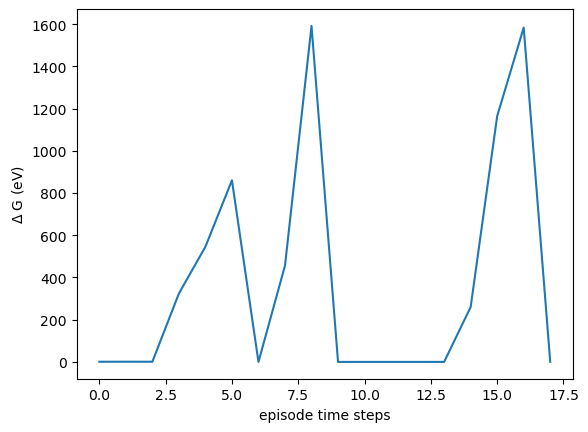

7 ../result_Cu4Pd5Ni6/trajs/2600_-1.330641_13.098411_3670.461482_5_5_11_full.traj
13
0 0.0
1 295.10896529033823
2 -2.365937007436875
3 274.4579955530867
4 696.0374558695502
5 -1.2119477222361894
6 -2.2954867969751938
7 258.64696107321106
8 1502.7563094826169
9 -1.8539945935179976
10 262.3353398322477
11 714.8611823625098
12 -1.1895019590964964


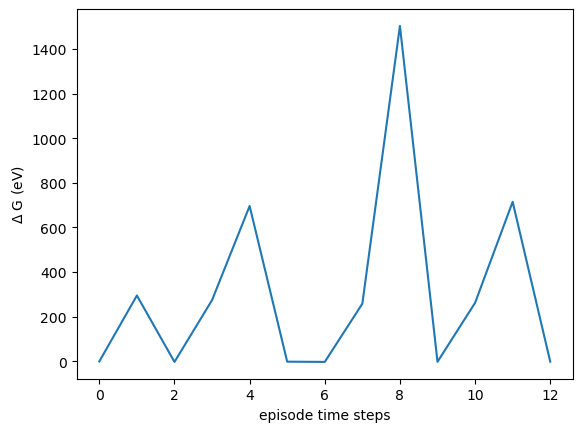

8 ../result_Cu4Pd5Ni6/trajs/2600_-1.638500_12.931949_4530.597249_7_5_11_full.traj
11
0 0.0
1 -0.2914943775758907
2 -0.6524099547727893
3 -1.2869639136979067
4 -1.2868318436404973
5 -1.8820195559188058
6 271.4479630267554
7 -1.882007312840054
8 350.89005115796016
9 899.0227745080222
10 -1.684734420935433


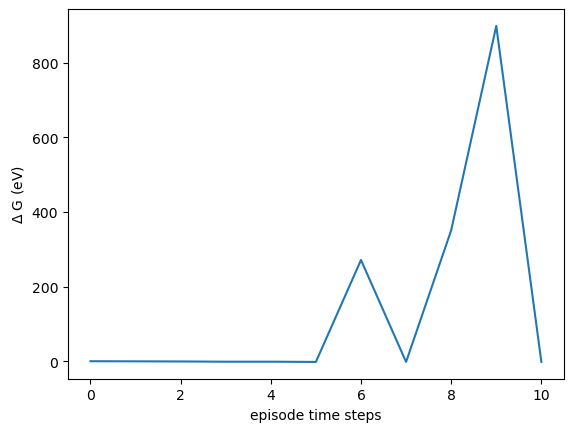

9 ../result_Cu4Pd5Ni6/trajs/2600_-1.059888_12.899136_2841.708602_7_5_11_full.traj
18
0 0.0
1 416.60305430230477
2 401.9715970147346
3 0.5765830481780156
4 368.6805949458769
5 -0.07930000664884496
6 -0.07943033130893262
7 -0.07941671412898366
8 383.2437839525853
9 -0.43292906983115564
10 432.38724492558237
11 1110.9339598115803
12 1686.0136442949151
13 -0.18878938044426086
14 334.77950207647154
15 843.9772690212224
16 1635.275211161556
17 0.3009949607965474


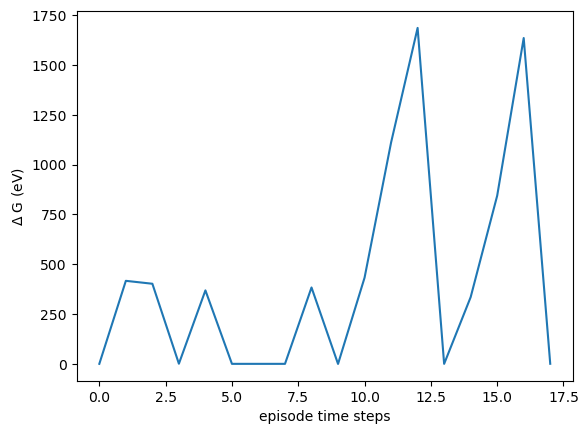

10 ../result_Cu4Pd5Ni6/trajs/2600_-0.872006_12.840140_2656.377965_7_5_11_full.traj
14
0 0.0
1 0.2436192254995806
2 -0.8408265037126998
3 423.9810982361774
4 993.689723255138
5 -0.443363330208685
6 -0.44353787684262436
7 -0.34464240289492487
8 -0.4599588225534035
9 259.1941674017279
10 848.6220242134475
11 1177.5916204466541
12 1666.3568717127387
13 -0.47847289507631885


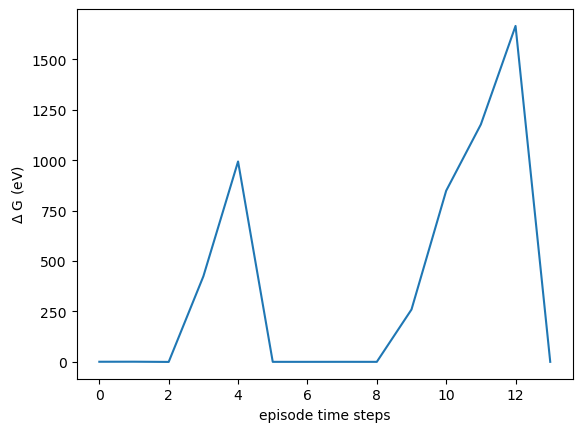

In [8]:
folder_path = '../result_Cu4Pd5Ni6/trajs/'
reg_selection = '2600_*'
extension = '.traj'
traj_file_path = folder_path + reg_selection + '.traj'
for i, file in enumerate(glob.glob(traj_file_path)):
    print(i, file)
    generate_traj_plot(file, cif = False)
    

9
0 0.0
1 -0.05912457020421691
2 -0.1687322074044566
3 -0.16864044519417654
4 -0.1687695254959749
5 -0.6235695299766331
6 -0.6235385351935179
7 -0.7775536339628033
8 -1.6934492308915878


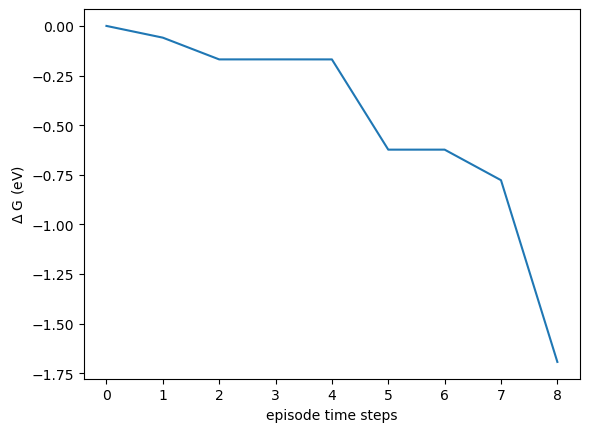

In [11]:
traj_fname = '../result_Cu4Pd5Ni6/trajs/2600_-2.524297_13.925385_7448.310727_8_5_11_full.traj'
#traj_fname = '../result_Cu4Pd5Ni6/trajs/990_-2.284101_15.369260_9539.904571_16_5_1653_full.traj'
generate_traj_plot(traj_fname, cif=True)